# SET 6

## Bahador Amjadi
## 2040470

## **Please restart the kernel and run all the cells at once, not seperately

## Exercise 1

In [1]:
library(rjags)

Warning message:
"package 'rjags' was built under R version 3.6.3"Loading required package: coda
Warning message:
"package 'coda' was built under R version 3.6.3"Linked to JAGS 4.3.0
Loaded modules: basemod,bugs


### 1.a

### This process is a bernouli process and follows a binomial distribution but since we dont have the the porbability of failure, we cant quantitavely plot the distribution.
### Anyway if sombody wants to use the former probablity (0.15) the follwing commented code can be used:

In [2]:
# options(repr.plot.width=11, repr.plot.height =6)  #changing size of plots
# p     <- c(1:30)
# n <- 75
# prob <- 0.15
# binom <- dbinom(p,n,prob)
# plot(p, binom, xlab="number of times", col="navy",lwd = 2.6,type="l",ylab="Density" )
# title(main=paste("former prob (15%. not the new method!) pdf of the number of times the new method fails"), line=0.7, cex.main=1.2)

### 1.b

In [3]:
n  <- 75
y  <- 6
prob.f <- y / n
cat("The frequentist estimation of failure probabilty is", prob.f)

The frequentist estimation of failure probabilty is 0.08

### 1.c

In [4]:
#function for finding beta and alpha given mean and std
beta.func  <- function(exp.x, std.x){return((((1-exp.x)*exp.x)/((std.x)**2) - 1) / (1+ exp.x/(1-exp.x)))}
alpha.func <- function(exp.x, std.x){return((exp.x/(1-exp.x))*(((1-exp.x)*exp.x)/((std.x)**2) - 1) / (1+ exp.x/(1-exp.x)))}

In [5]:
#a function that plots post. dist. for beta priors and prints some useful measuremnets
beta.plotter <- function(n, y, exp.x, std.x, ylim){

    alpha.prior <- alpha.func(exp.x, std.x )
    beta.prior  <- beta.func (exp.x, std.x )
   
    alpha.post  <<-alpha.prior+y
    beta.post   <<-beta.prior-y+n
    
    p.post      <- dbeta(x=p, shape1=alpha.post, shape2=beta.post)
    Mean    <- alpha.post / (alpha.post + beta.post    )
    Var     <- alpha.post * beta.post / (alpha.post + beta.post)^2 / (alpha.post + beta.post + 1)
    
    plot(p, p.post , col="black",lwd = 2.6,type="l", xlim=c(0,0.4),xlab="P", ylab="Density")
    abline(v=Mean,   col="firebrick3" , lwd = 2)
    abline(v=Mean-sqrt(Var) ,   col="navyblue" ,lty = 2, lwd = 2 )
    abline(v=Mean +sqrt(Var) ,   col="navyblue" ,lty = 2, lwd = 2)
    legend(0.2,8, col=c("firebrick3", "navyblue"),box.lty=0,lty=1:3,cex=1.2,
        legend=c(parse(text = paste0('Mean==', round(Mean, 3))),
                 parse(text = paste0('Variance==',   round(Var,3)))))
    title(main=paste("Bayesian Computation of the Posterior Prob."), line=0.7, cex.main=1.4)}

In [6]:
#fixing some paramteres
p     <- seq(from= 0,to=0.4,length.out = 1000)
options(repr.plot.width=11, repr.plot.height =6)  #changing size of plots
ylim <- c(0,17)  #setting the y axis range

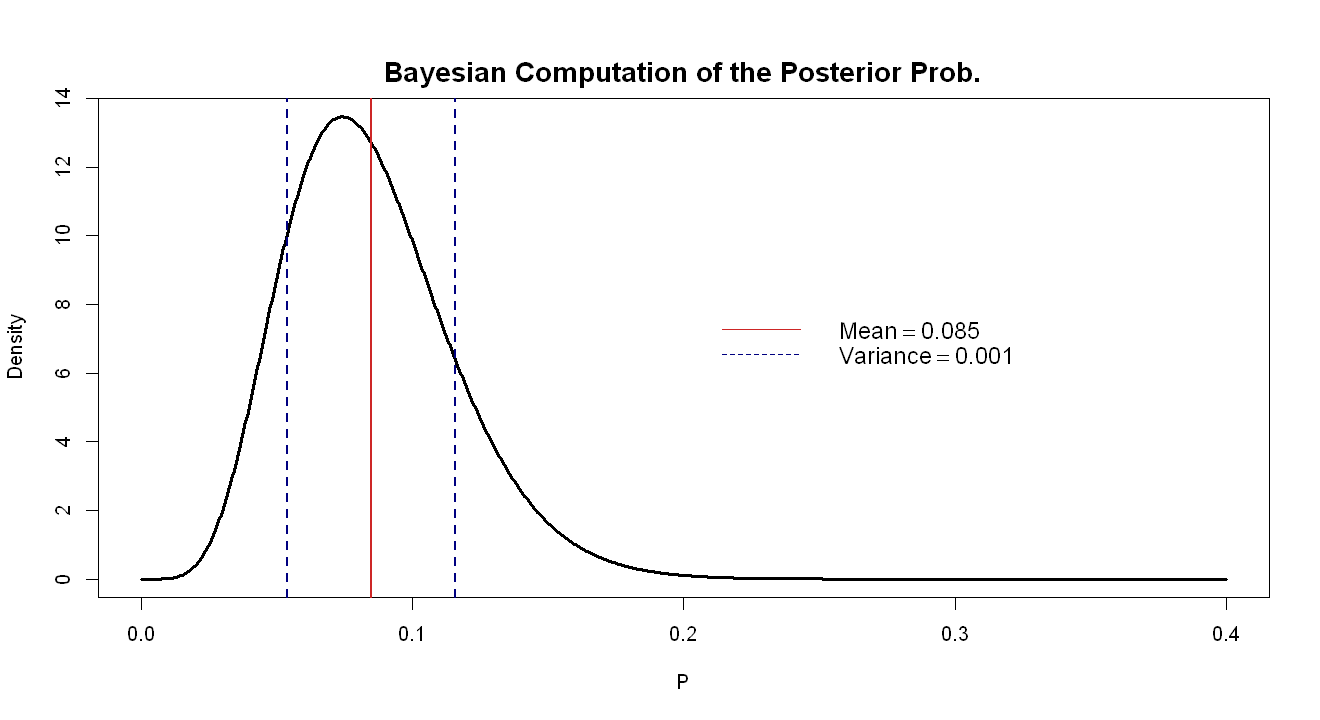

In [7]:
beta.plotter(n, y, 0.15, 0.14, ylim)

### 1.d

In [8]:
#bayesian method
p.value <- pbeta(0.15, alpha.post, beta.post, lower.tail = FALSE)
alpha   <- 0.05
if (p.value<alpha){cat("H0 is rejected at alpha=0.05 level of significance")}

H0 is rejected at alpha=0.05 level of significance

In [9]:
#frequentist method
binom.test(y, n, 0.15 , alternative = 'l')


	Exact binomial test

data:  y and n
number of successes = 6, number of trials = 75, p-value = 0.05435
alternative hypothesis: true probability of success is less than 0.15
95 percent confidence interval:
 0.0000000 0.1517971
sample estimates:
probability of success 
                  0.08 


## Exercise 2

In [10]:
#a function that plots poisson distribution for differnt priors and other properties
pois.plotter <- function(numbers, prior, ylim){
    if (prior == 'Jeffrey'){               #jeffrey prior: alpha:0.5, lambda: 0 
        alpha.prior <- 0.5; lambda.prior <- 0
        alpha.pos  <- sum(numbers)    + 0.5
        lambda.pos <- length(numbers)}
    else if(prior == 'Uniform'){           #uniform prior: alpha:1, lambda: 0 
        alpha.prior <- 1; lambda.prior <- 0
        alpha.pos  <- sum(numbers)    + 1
        lambda.pos <- length(numbers)}  
    else {cat("unrecognized prior function!")}
        
    Mean =   alpha.pos/lambda.pos
    Median = qgamma(0.5, shape=alpha.pos, rate=lambda.pos)
    Var    = alpha.pos/(lambda.pos**2)
    q1 = qgamma(0.05,shape = alpha.pos ,scale = 1/lambda.pos)
    q2 = qgamma(0.95,shape = alpha.pos ,scale= 1/lambda.pos)

    p.post  <- dgamma(x=p,shape = alpha.pos ,rate= lambda.pos)
    plot(p, p.post , col="black",lwd = 3, type="l",ylim = ylim,xlab="P", ylab="Density")
    abline(v=Mean,    col="firebrick3",  lwd = 2 )
    abline(v=Median,  col="navyblue",  lwd = 2 )
    abline(v=q1,   col="snow4" ,lty = 2,  lwd = 2)
    abline(v=q2,   col="snow4" ,lty = 2,  lwd = 2)
    
    legend("right", col=c("firebrick3", "navyblue", "snow4","snow4"),box.lty=0,lty=1:1,cex=1.2,
            legend=c(parse(text = paste0('Mean==',    round(Mean, 3))),
                     parse(text = paste0('Median==',  round(Median,3))),
                     parse(text = paste0('q(0.05)==' , round(q1,3))),
                     parse(text = paste0('q(0.095)==',  round(q2,3)))))    
    text(1.26,1.7 , col="red",
         lwd = 1, pos=4, cex=1, paste("Variance: ", round(Var, 3) , sep=""))
    title(main=paste("Posterior Dist,", prior, "Prior"), line=0.7, cex.main=1.4)}

In [11]:
#fixing some global paramteres
p     <<- seq(from= 0.47,to=1,length.out = 1000)
options(repr.plot.width=11, repr.plot.height =6)  #changing size of plots

numbers.1 <- c(rep(0, 109), rep(1, 65), rep(2, 22), rep(3, 3), rep(4,1))
numbers.2 <- c(rep(0, 144), rep(1, 91), rep(2, 32), rep(3, 11), rep(4,2))

ylim <- c(0,8)  #setting the y axis range

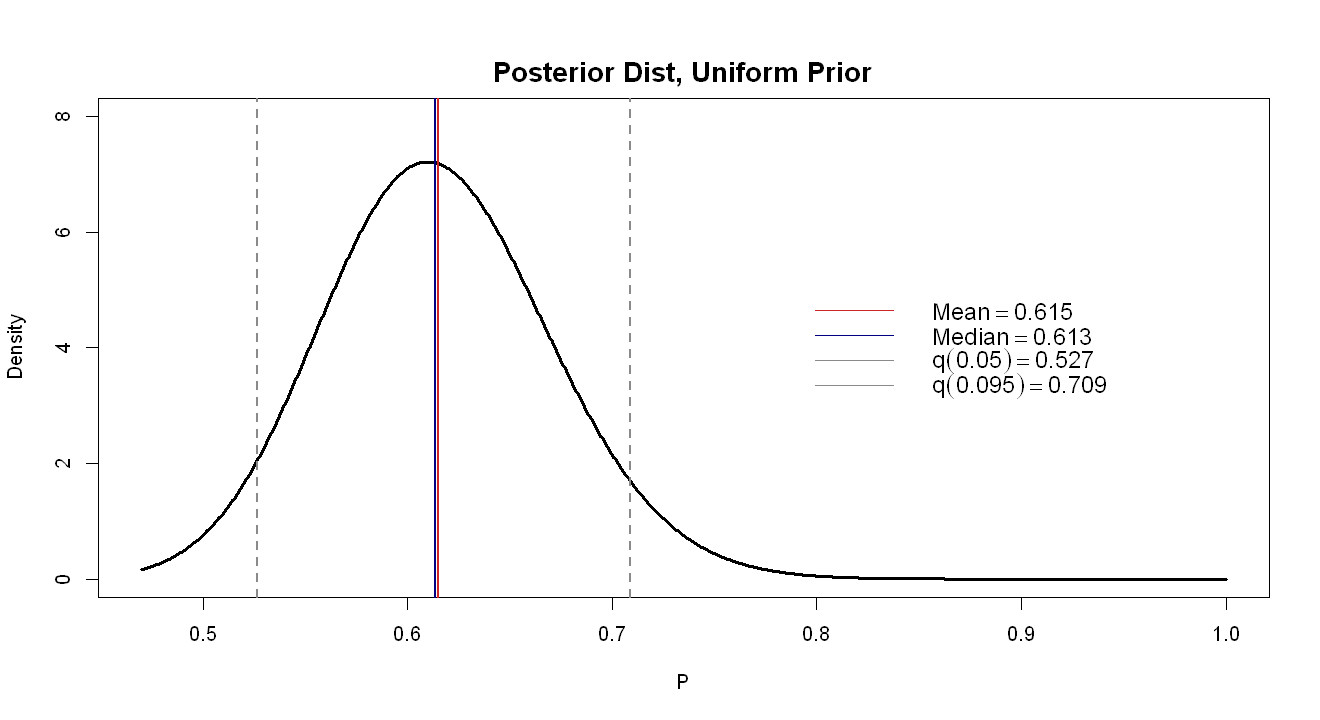

In [12]:
#for the first set of observations: n1
pois.plotter(numbers.1,'Uniform', ylim)

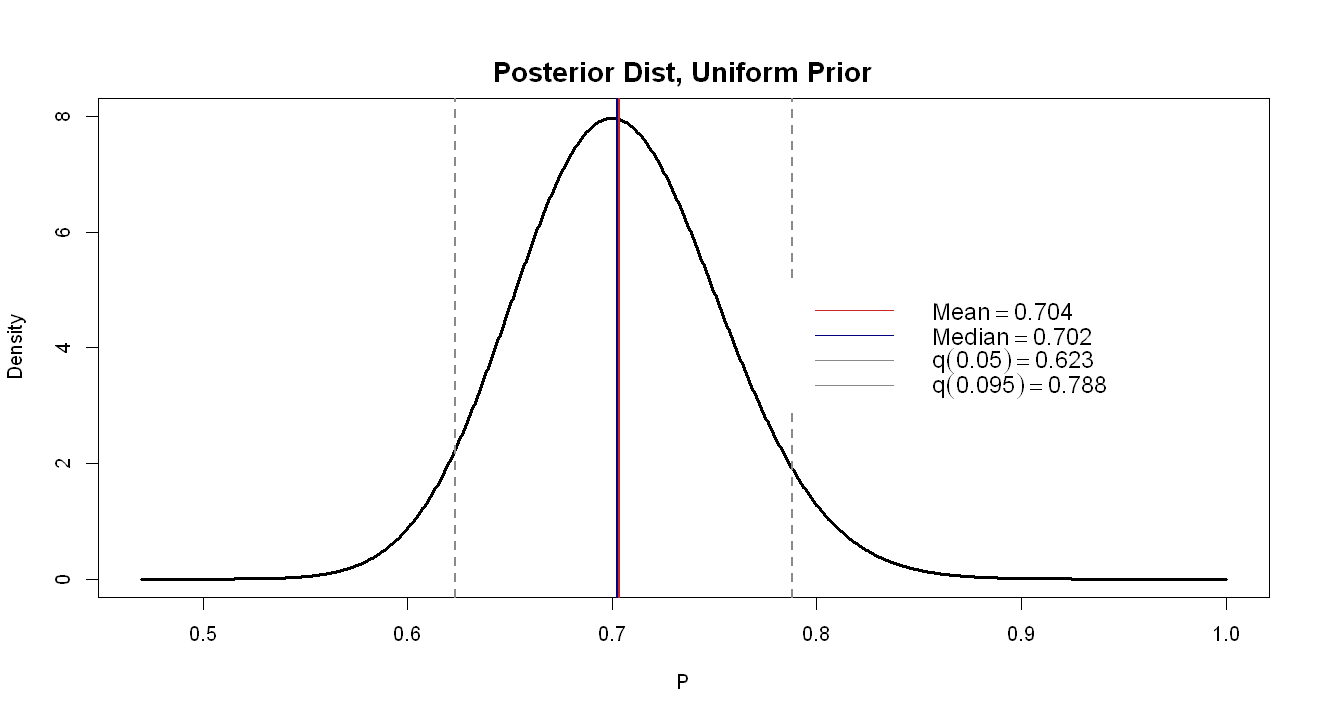

In [13]:
#for the second set of observations: n2
pois.plotter(numbers.2,'Uniform', ylim)

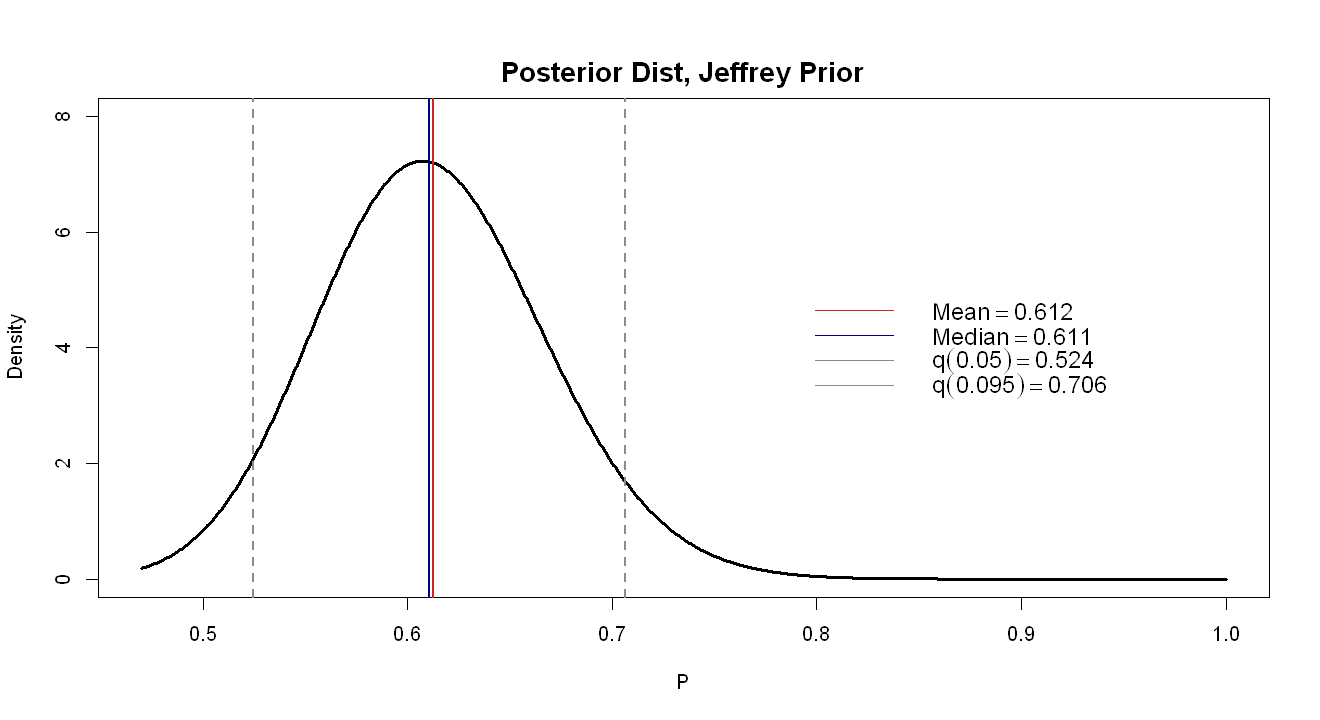

In [14]:
#for the first set of observations: n1
pois.plotter(numbers.1,'Jeffrey', ylim)

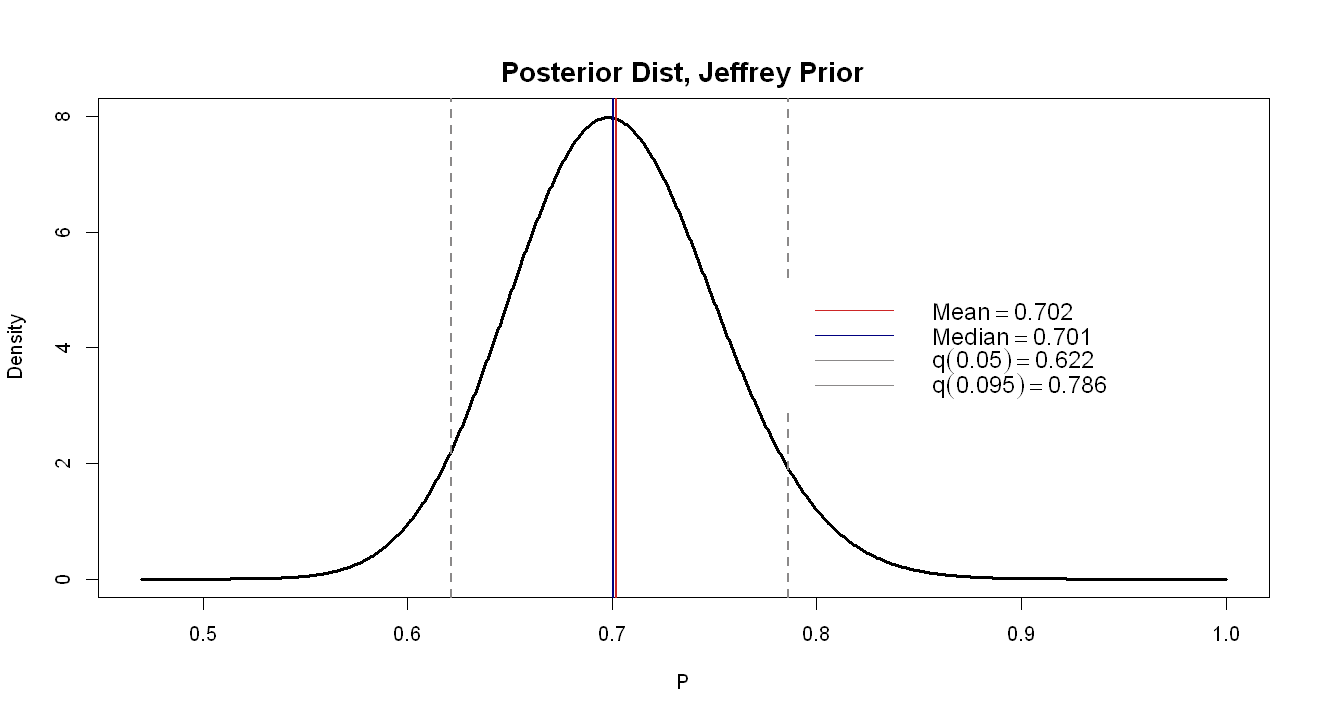

In [15]:
#for the second set of observations: n2
pois.plotter(numbers.2,'Jeffrey', ylim)

## Exercise 3

### 3.a

In [16]:
n <- 116
y <-  11
prob.f <- y / n
cat("The frequentist estimation of prob. of high bacter X level is", prob.f)

The frequentist estimation of prob. of high bacter X level is 0.09482759

### 3.b and 3.c

In [17]:
#a function that finds and plot posterior dist. given for beta prior
beta.plotter <- function(n,y, alpha.prior, beta.prior, ylim){
    
    alpha.post <<- alpha.prior+y
    beta.post  <<- beta.prior-y+n
    
    alpha.old <<-alpha.post    #used for the parts 3.f and 3.g
    beta.old  <<-beta.post     #used for the parts 3.f and 3.g
    
    Mean    <-  alpha.post / (alpha.post + beta.post    )
    Var     <- alpha.post * beta.post / (alpha.post + beta.post)^2 / (alpha.post + beta.post + 1)
    
    Mode    <-     (alpha.post - 1)        / (alpha.post + beta.post - 2)
    Median  <-     qbeta(0.5, shape1=alpha.post, shape2=beta.post)
    q1      <-     qbeta(0.05,shape1=alpha.post, shape2=beta.post)
    q2      <-     qbeta(0.95,shape1=alpha.post, shape2=beta.post)
    p.post  <- dbeta(x=p, shape1=alpha.post, shape2=beta.post)
    
    plot(p, p.post , col="black",lwd = 3, type="l",ylim = ylim,xlab="P", ylab="Density")
    abline(v=Mean,    col="firebrick3",  lwd = 2 )
    abline(v=Median,  col="navyblue",  lwd = 2 )
    abline(v=q1,   col="snow4" ,lty = 2,  lwd = 2)
    abline(v=q2,   col="snow4" ,lty = 2,  lwd = 2)
    
    legend(0.2,14, col=c("firebrick3", "navyblue", "snow4","snow4"),box.lty=0,lty=1:1,cex=1.2,
            legend=c(parse(text = paste0('Mean==',    round(Mean, 3))),
                     parse(text = paste0('Median==',  round(Median,3))),
                     parse(text = paste0('q(0.05)==' , round(q1,3))),
                     parse(text = paste0('q(0.095)==',  round(q2,3)))))    
    text(0.252,6 , col="black",
         lwd = 1, pos=4, cex=1, paste("Variance: ", round(Var, 5) , sep=""))
    text(0.252,4.5 , col="red",
         lwd = 1, pos=4, cex=1, paste("Best Estimate: ", round(Mode,4) , sep=""))

    title(main=paste("Posterior Dist using Beta Prior"), line=0.7, cex.main=1.4)}

In [18]:
#fixing some global paramteres
p     <<- seq(from= 0,to=0.4,length.out = 1000)
options(repr.plot.width=11, repr.plot.height =6)  #changing size of plots

ylim <- c(0,20)  #setting the y axis range

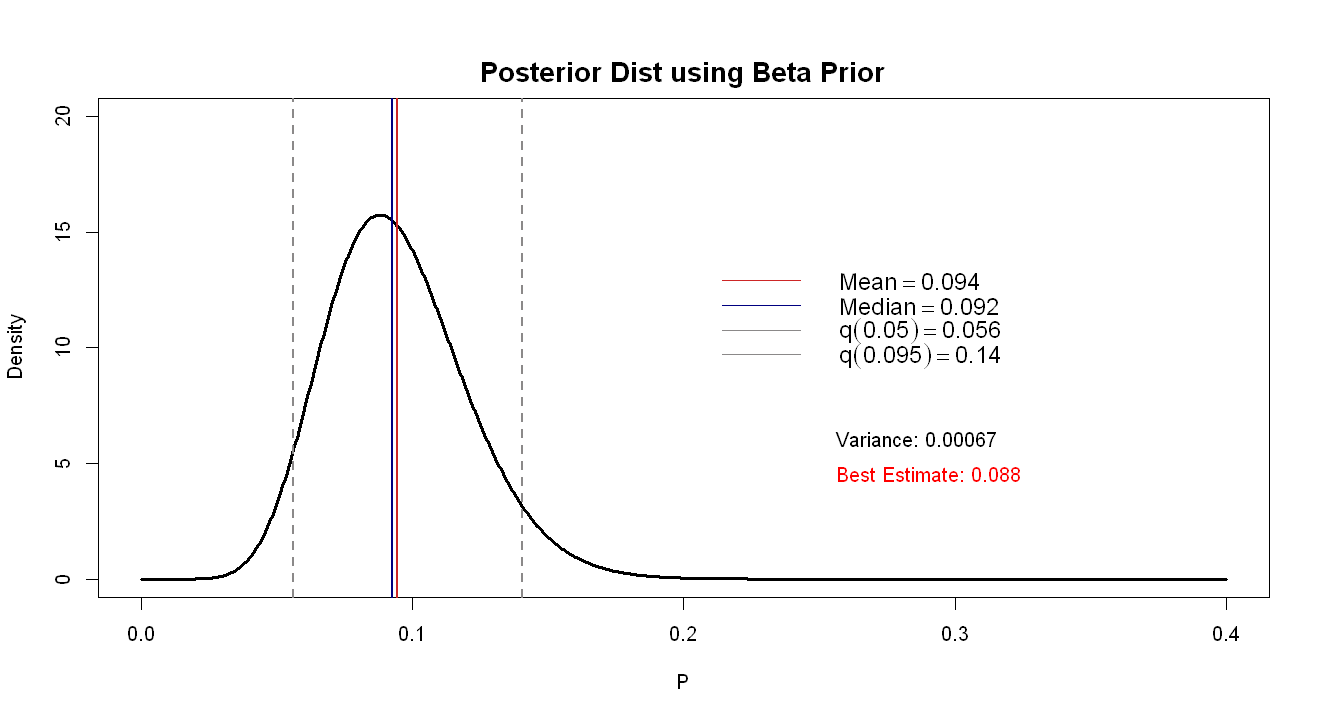

In [19]:
beta.plotter(n,y, alpha.prior = 1 , beta.prior = 10, ylim)

### 3.d

In [20]:
# bayesian method

p.value <- pbeta(0.1, alpha.post, beta.post, lower.tail = FALSE)
alpha   <- 0.05
if (p.value>alpha){cat("H0 is accepted at alpha=0.05 level of significance")}

H0 is accepted at alpha=0.05 level of significance

In [21]:
# frequentist method
binom.test(y, n, p = .1, alternative = 'l')


	Exact binomial test

data:  y and n
number of successes = 11, number of trials = 116, p-value = 0.5043
alternative hypothesis: true probability of success is less than 0.1
95 percent confidence interval:
 0.0000000 0.1520786
sample estimates:
probability of success 
            0.09482759 


### 3.e

In [22]:
n <- 165
y <- 9

In [23]:
prob.f <- y / n
cat("The frequentist estimation of prob. of high bacter X level is", prob.f)

The frequentist estimation of prob. of high bacter X level is 0.05454545

### 3.f and 3.g

In [24]:
#fixing some global paramteres
p     <<- seq(from= 0,to=0.4,length.out = 1000)
options(repr.plot.width=11, repr.plot.height =6)  #changing size of plots

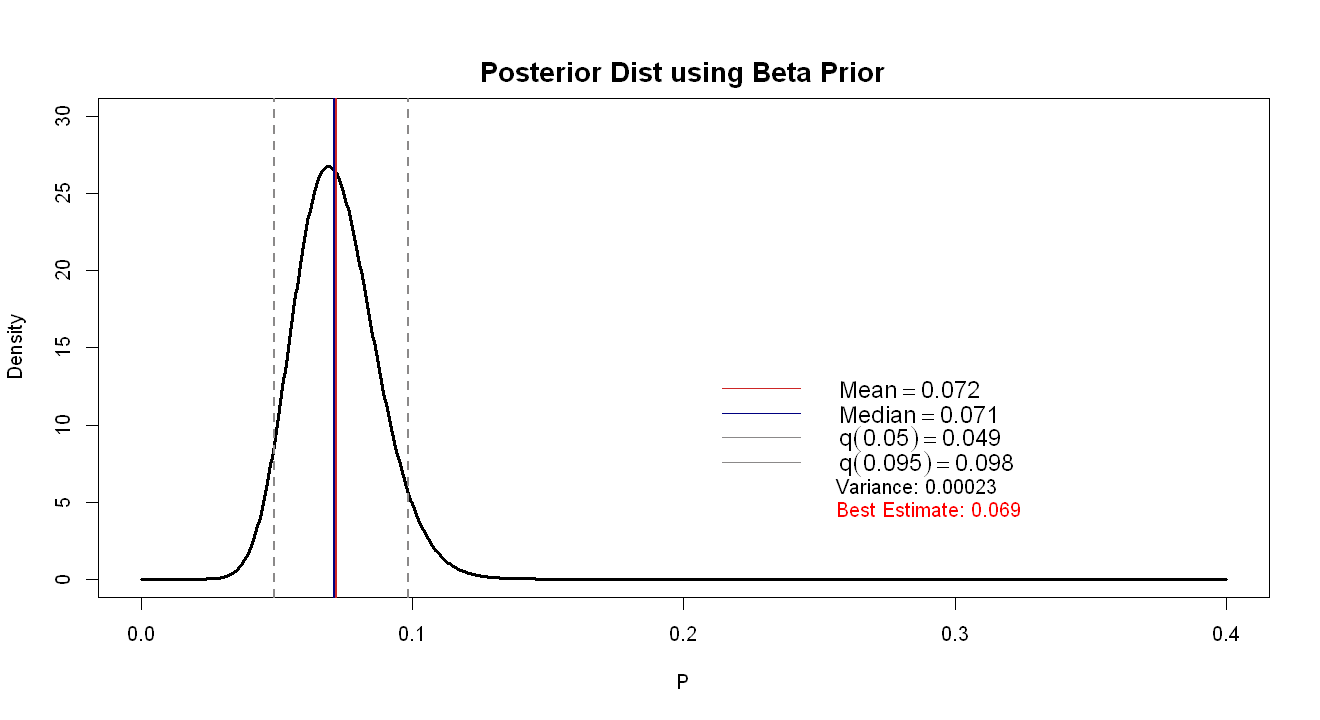

In [25]:
#Using the older posterior as the new prior
ylim <- c(0,30)  #setting the y axis range
beta.plotter(n,y,alpha.prior = alpha.old , beta.old , ylim)

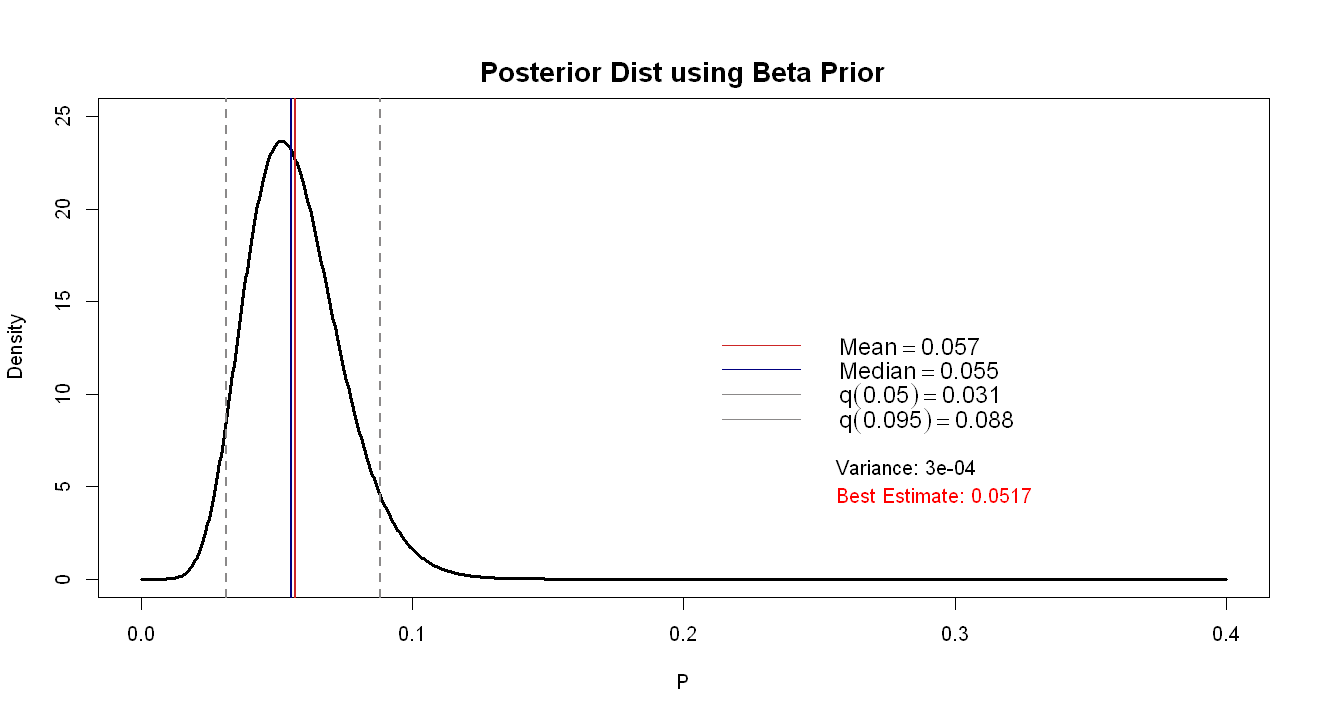

In [26]:
#Using Beta(1,10) as the Prior

ylim <- c(0,25)  #setting the y axis range
beta.plotter(n,y,alpha.prior = 1 , beta.prior = 10, ylim)

### 3.h

In [27]:
# bayesian method
p.value <- pbeta(0.1, alpha.post, beta.post, lower.tail = FALSE)
alpha   <- 0.05
if (p.value<alpha){cat("H0 is rejected at alpha=0.05 level of significance")}

H0 is rejected at alpha=0.05 level of significance

In [28]:
# frequentist method
binom.test(y, n, p = .1, alternative = 'l')


	Exact binomial test

data:  y and n
number of successes = 9, number of trials = 165, p-value = 0.02746
alternative hypothesis: true probability of success is less than 0.1
95 percent confidence interval:
 0.00000000 0.09325125
sample estimates:
probability of success 
            0.05454545 


## Exercise 4

In [29]:
dir.create('models')  #creating a folder to save the models text files in
folder <- 'models'

Warning message in dir.create("models"):
"'models' already exists"

In [30]:
mean       <- 0.15
std        <- 0.14

In [31]:
filestring = c("model {for(i in 1:n){
                X[i] ~ dbern(p);
                }
                p ~ dbeta(alpha, beta);
                y ~ dbin(p, n_next);
                }")

In [32]:
fileConn<-file("models/model_4.txt")
writeLines(filestring, fileConn)
close(fileConn)

In [33]:
#using functions defined in previous exercises
alpha.prior<- alpha.func(mean, std)
beta.prior <- beta.func(mean, std)

In [34]:
y <- 6
n <- 75
numbers <- c(rep(0, n-y), rep(1, y))  #our observation

data <- NULL
data$X <- numbers
data$n <- n

data$n_next <- 10 # Predictions

data$alpha <- alpha.prior
data$beta  <- beta.prior

jm <- jags.model(file=paste(folder, "model_4.txt", sep="/"), data)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 75
   Unobserved stochastic nodes: 2
   Total graph size: 81

Initializing model



In [35]:
# Update the Markov chain (Burn -in)
update(jm , 1000)
chain <- coda.samples(jm , c("p", "y"), n.iter=10000)
print(summary(chain))


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

     Mean      SD  Naive SE Time-series SE
p 0.08483 0.03065 0.0003065      0.0003127
y 0.85720 0.93472 0.0093472      0.0093472

2. Quantiles for each variable:

     2.5%     25%     50%    75%  97.5%
p 0.03512 0.06258 0.08143 0.1032 0.1536
y 0.00000 0.00000 1.00000 1.0000 3.0000



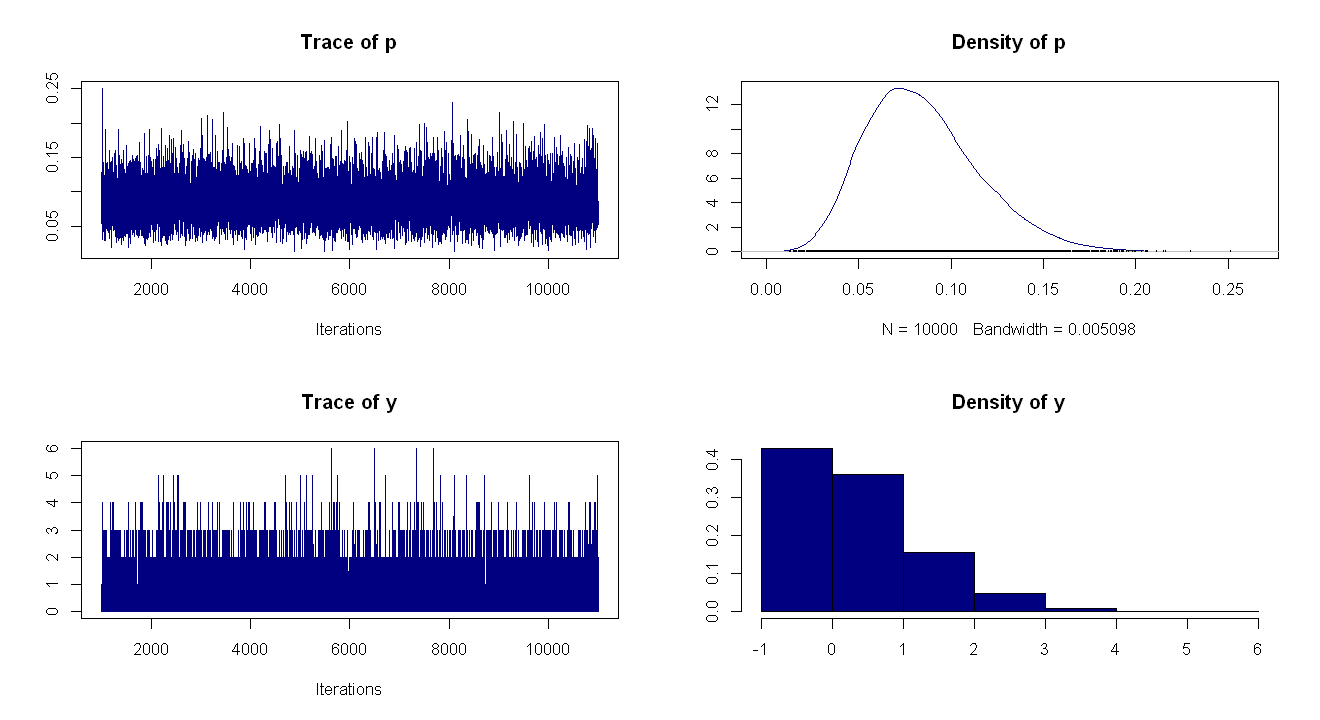

In [36]:
plot(chain , col="navy")


 Correlation matrix: 
          p         y
p 1.0000000 0.3376112
y 0.3376112 1.0000000


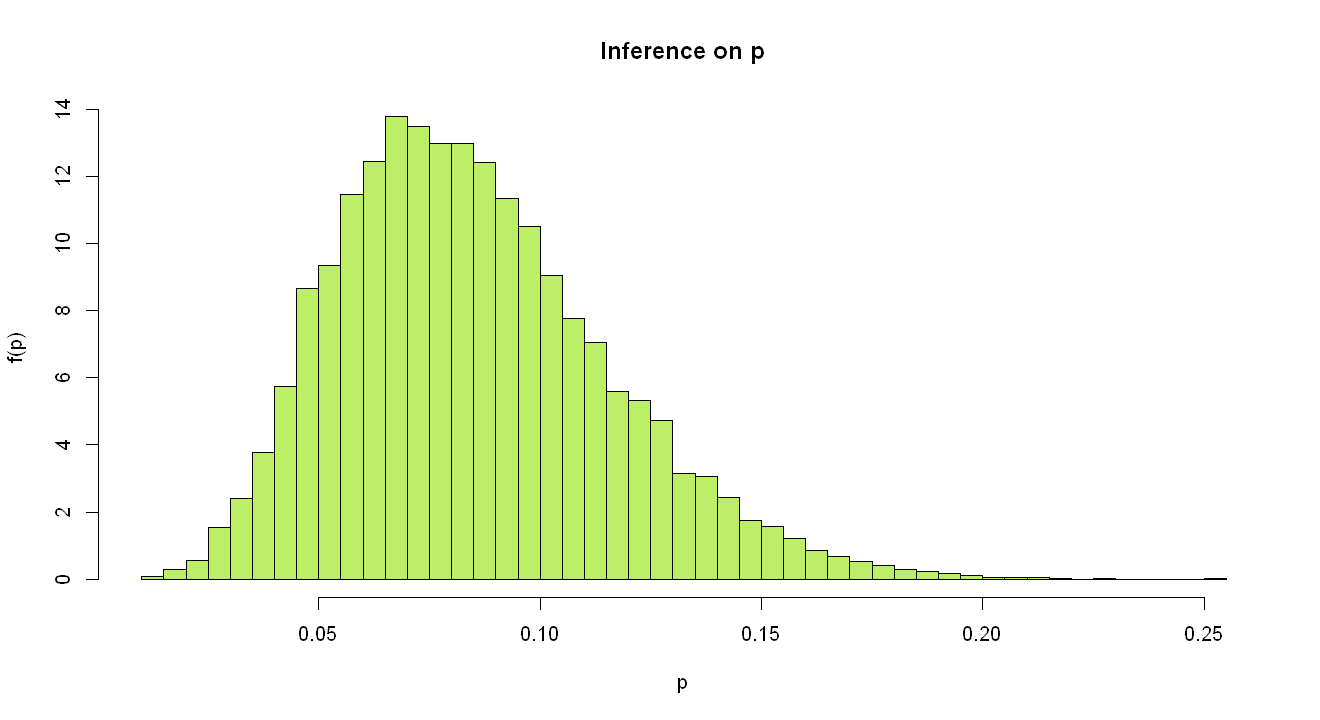

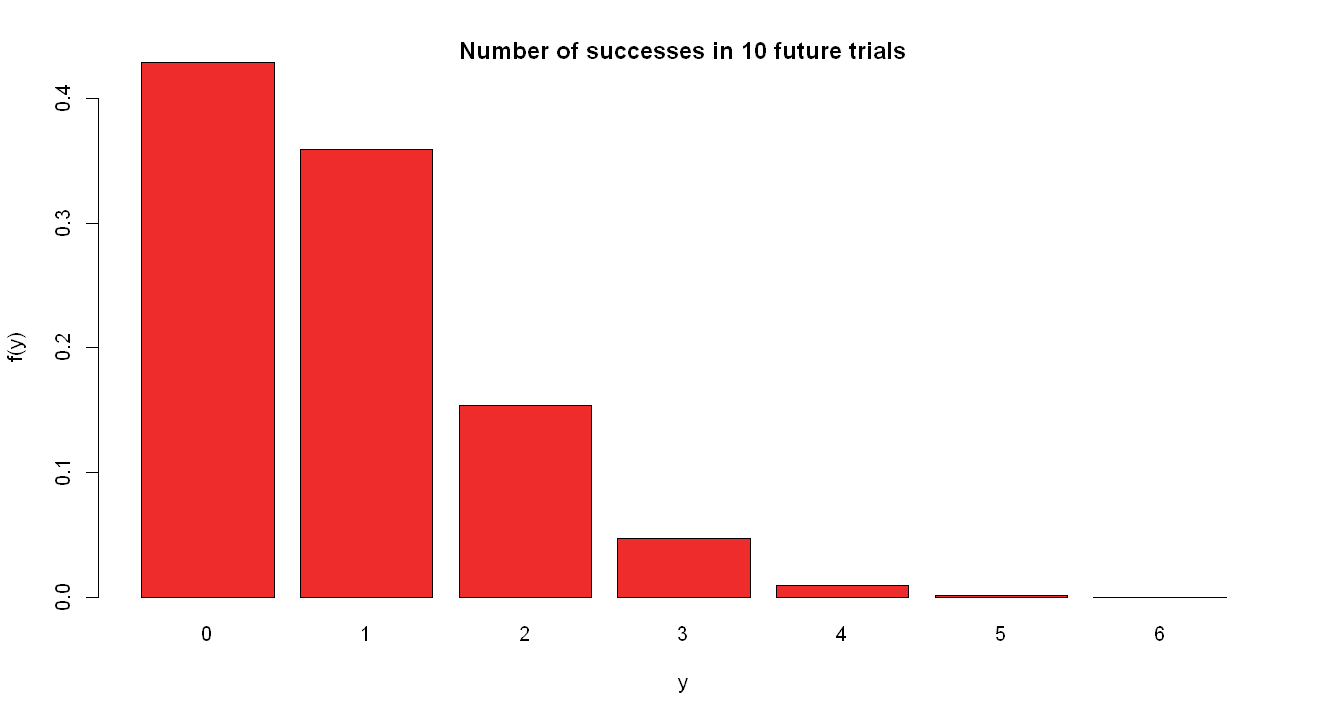

In [37]:
# Let's format our chain
chain.df <- as.data.frame( as.mcmc(chain) )
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain.df))
#
# p inference result
#
hist(chain.df$p, nc=50, prob=TRUE , col='darkolivegreen2',
xlab='p', ylab='f(p)', main='Inference on p')
#
# next data prediction probability
#
ty <- table(chain.df$y)
barplot(ty/sum(ty), col='firebrick2', xlab='y', ylab='f(y)',
ylim=c(0,0.40),
main=sprintf('Number of successes in %d future trials', data$n_next))

## Exercise 5

In [38]:
numbers.1 <- c(rep(0, 109), rep(1, 65), rep(2, 22), rep(3, 3), rep(4,1))
numbers.2 <- c(rep(0, 144), rep(1, 91), rep(2, 32), rep(3, 11), rep(4,2))

### First we use a uniform prior:

In [39]:
#here we define our model
filestring = c("
    model{
        for (i in 1:length(X)) {
            X[i] ~ dpois(lambda);
        }
              lambda ~ dunif(min.prior, max.prior)
        y ~ dpois(lambda);
    }")

In [40]:
fileConn<-file("models/model_5.txt")
writeLines(filestring, fileConn)
close(fileConn)

In [41]:
data_1 <- NULL
data_1$X <- numbers.1
data_1$min.prior <- 0
data_1$max.prior <- 10

data_2 <- NULL
data_2$X <- numbers.2
data_2$min.prior <- 0
data_2$max.prior <- 10

In [42]:
jm_1 <- jags.model(paste(folder, "model_5.txt", sep="/"), data_1)
jm_2 <- jags.model(paste(folder, "model_5.txt", sep="/"), data_2)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 200
   Unobserved stochastic nodes: 2
   Total graph size: 204

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 280
   Unobserved stochastic nodes: 2
   Total graph size: 284

Initializing model



In [43]:
# Update the Markov chain (Burn -in)
update(jm_1 , 1000)
chain_1 <- coda.samples(jm_1 , c("lambda", "y"), n.iter=10000)
print(summary(chain_1))
cat("##############################################################")
update(jm_2 , 1000)
chain_2 <- coda.samples(jm_2 , c("lambda", "y"), n.iter=10000)
print(summary(chain_2))


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
lambda 0.6155 0.05567 0.0005567      0.0007473
y      0.6105 0.78119 0.0078119      0.0079849

2. Quantiles for each variable:

         2.5%    25%    50%    75%  97.5%
lambda 0.5104 0.5769 0.6135 0.6524 0.7289
y      0.0000 0.0000 0.0000 1.0000 3.0000

##############################################################
Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean     SD Naive SE Time-series SE
lambda 0.7026 0.0500 0.000500      0.0006603
y      0.7061 0.8468 0.008468      0.0084676

2. Quantiles for each variable:

         2.5%    25%    50%    75%  97.5%
lambda 0.6074 0.6687 0.7018

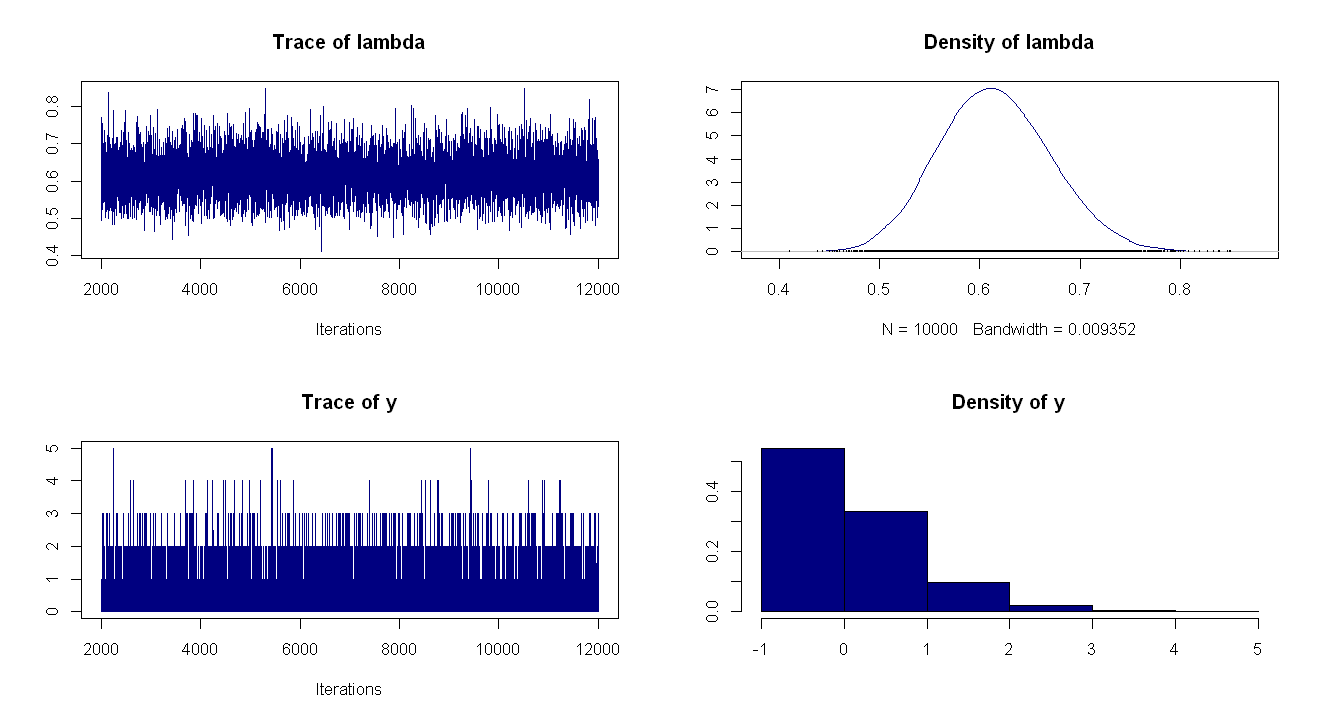

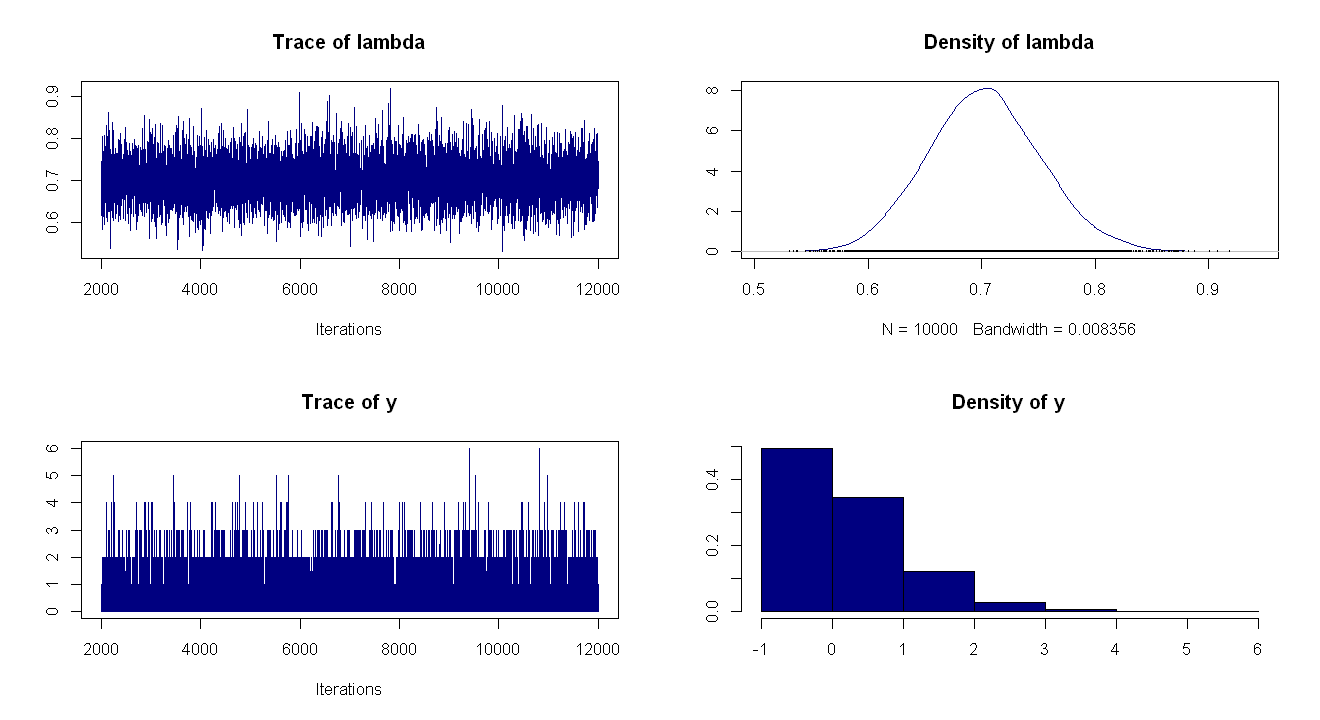

In [44]:
plot(chain_1 , col="navy")
plot(chain_2 , col="navy")


 Correlation matrix: 
           lambda          y
lambda 1.00000000 0.08336313
y      0.08336313 1.00000000


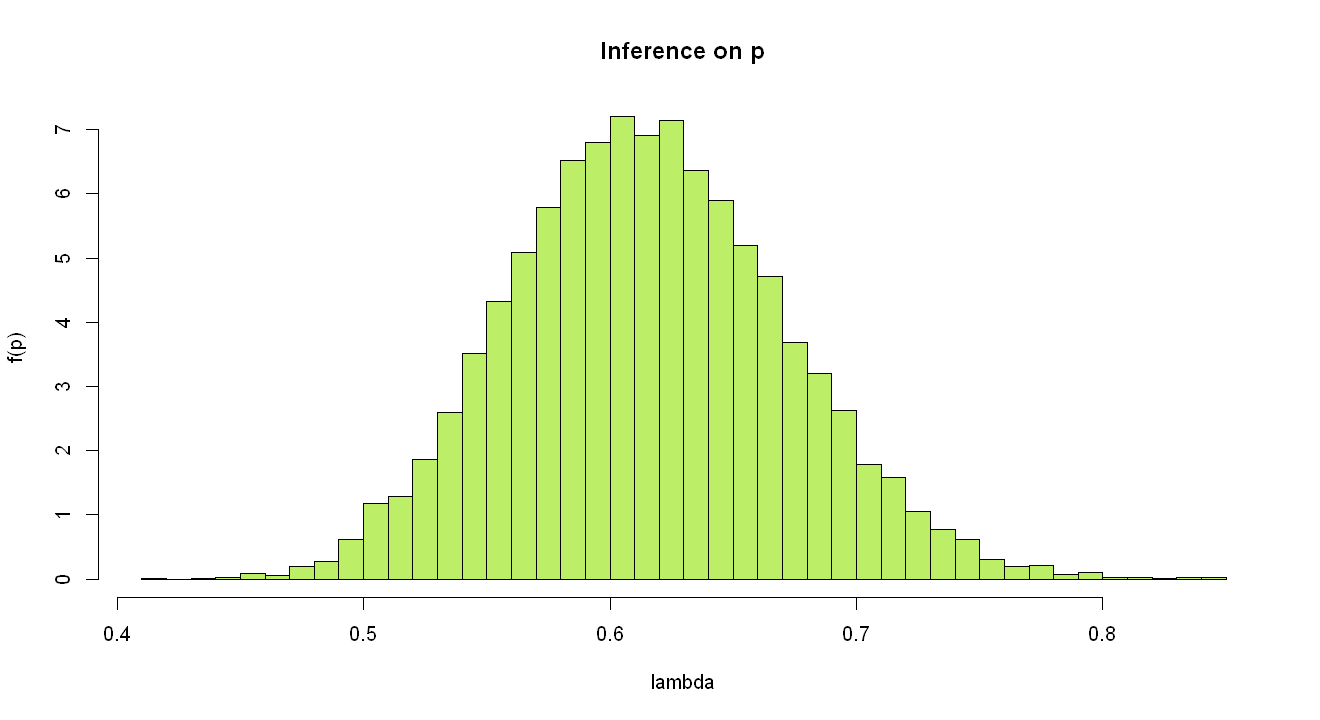

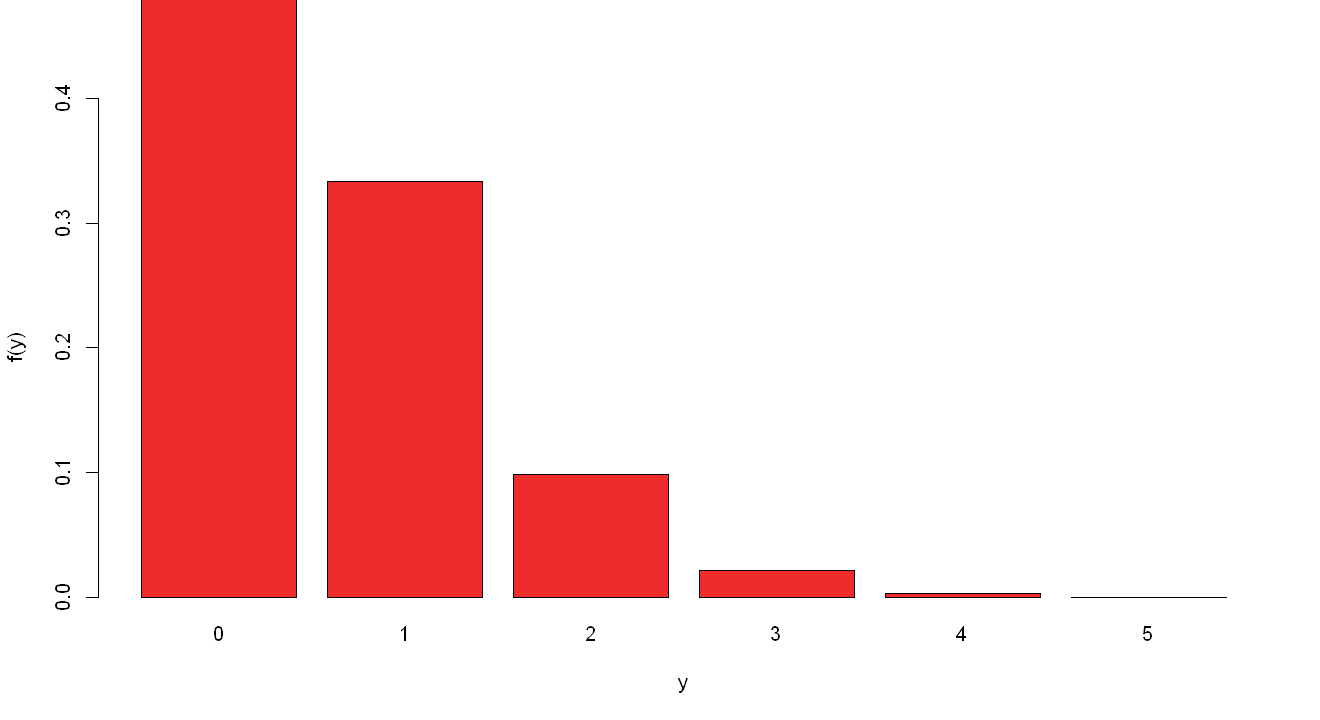

In [45]:

# Let's format our chain
chain_1.df <- as.data.frame( as.mcmc(chain_1) )
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain_1.df))
#
# p inference result
#
hist(chain_1.df$lambda, nc=50, prob=TRUE , col='darkolivegreen2',
xlab='lambda', ylab='f(p)', main='Inference on p')
#
# next data prediction probability
#
ty <- table(chain_1.df$y)
barplot(ty/sum(ty), col='firebrick2', xlab='y', ylab='f(y)',
ylim=c(0,0.40),
main=sprintf('Number of successes in %d future trials', data_1$n_next))


 Correlation matrix: 
           lambda          y
lambda 1.00000000 0.05228126
y      0.05228126 1.00000000


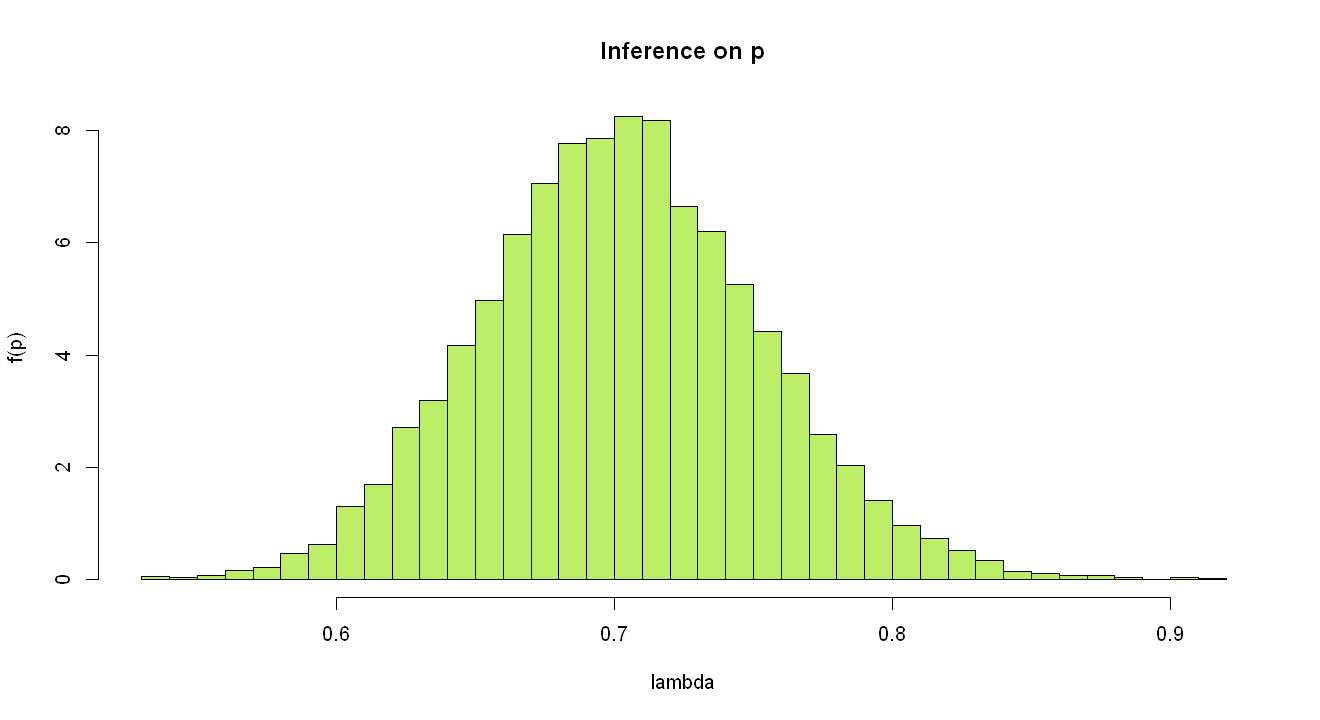

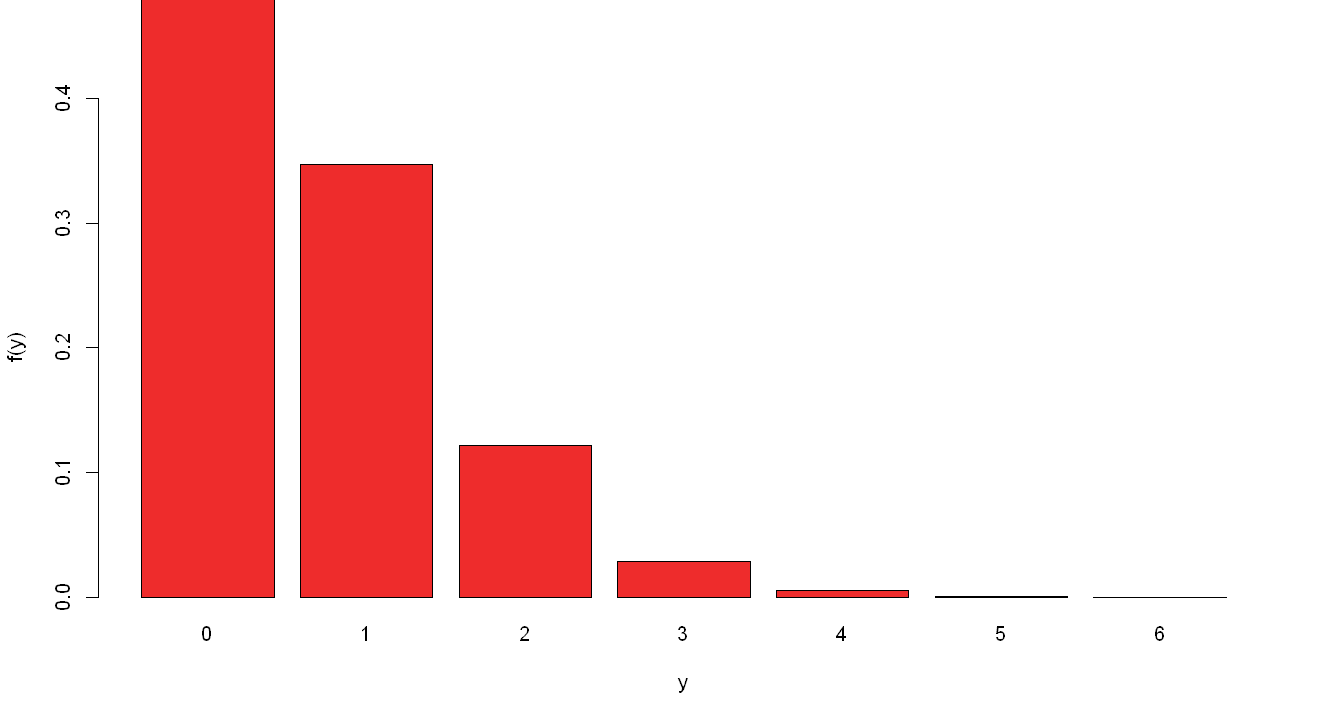

In [46]:

# Let's format our chain
chain_2.df <- as.data.frame( as.mcmc(chain_2) )
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain_2.df))
#
# p inference result
#
hist(chain_2.df$lambda, nc=50, prob=TRUE , col='darkolivegreen2',
xlab='lambda', ylab='f(p)', main='Inference on p')
#
# next data prediction probability
#
ty <- table(chain_2.df$y)
barplot(ty/sum(ty), col='firebrick2', xlab='y', ylab='f(y)',
ylim=c(0,0.40),
main=sprintf('Number of successes in %d future trials', data_1$n_next))
#

### Now we use Jefferry as the prior

In [47]:
filestring = c("
    model{
        for (i in 1:length(X)) {
            X[i] ~ dpois(lambda);
        }
        lambda ~ dbeta(1/2, 1/2)
        y ~ dpois(lambda);
    }")

In [48]:
fileConn<-file("models/model_5b.txt")
writeLines(filestring, fileConn)
close(fileConn)

In [49]:
data.1 <- NULL
data.1$X <- numbers.1
data.1$min.prior <- 0
data.1$max.prior <- 10

data.2 <- NULL
data.2$X <- numbers.2
data.2$min.prior <- 0
data.2$max.prior <- 10

jm.1 <- jags.model(file=paste(folder, "model_5b.txt", sep="/"), data.1)
jm.2 <- jags.model(file=paste(folder, "model_5b.txt", sep="/"), data.2)

Warning message in jags.model(file = paste(folder, "model_5b.txt", sep = "/"), data.1):
"Unused variable "min.prior" in data"Warning message in jags.model(file = paste(folder, "model_5b.txt", sep = "/"), data.1):
"Unused variable "max.prior" in data"

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 200
   Unobserved stochastic nodes: 2
   Total graph size: 205

Initializing model



Warning message in jags.model(file = paste(folder, "model_5b.txt", sep = "/"), data.2):
"Unused variable "min.prior" in data"Warning message in jags.model(file = paste(folder, "model_5b.txt", sep = "/"), data.2):
"Unused variable "max.prior" in data"

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 280
   Unobserved stochastic nodes: 2
   Total graph size: 285

Initializing model



In [50]:
# Update the Markov chain (Burn -in)
update(jm.1 , 1000)
chain.1 <- coda.samples(jm.1 , c("lambda", "y"), n.iter=10000)
print(summary(chain.1))


update(jm.2 , 1000)
chain.2 <- coda.samples(jm.2 , c("lambda", "y"), n.iter=10000)
print(summary(chain.2))


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
lambda 0.6167 0.05552 0.0005552      0.0006994
y      0.6087 0.77139 0.0077139      0.0077139

2. Quantiles for each variable:

        2.5%    25%    50%    75%  97.5%
lambda 0.512 0.5782 0.6152 0.6533 0.7314
y      0.000 0.0000 0.0000 1.0000 2.0000


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
lambda 0.7058 0.04956 0.0004956      0.0006309
y      0.7027 0.83928 0.0083928      0.0083928

2. Quantiles for each variable:

         2.5%    25%   50%    75%  97.5%
lambda 0.6128 0.6722 0.704 0.7387 0.8059
y      0.0000 0.0000 1.000 1.0000 3.0000



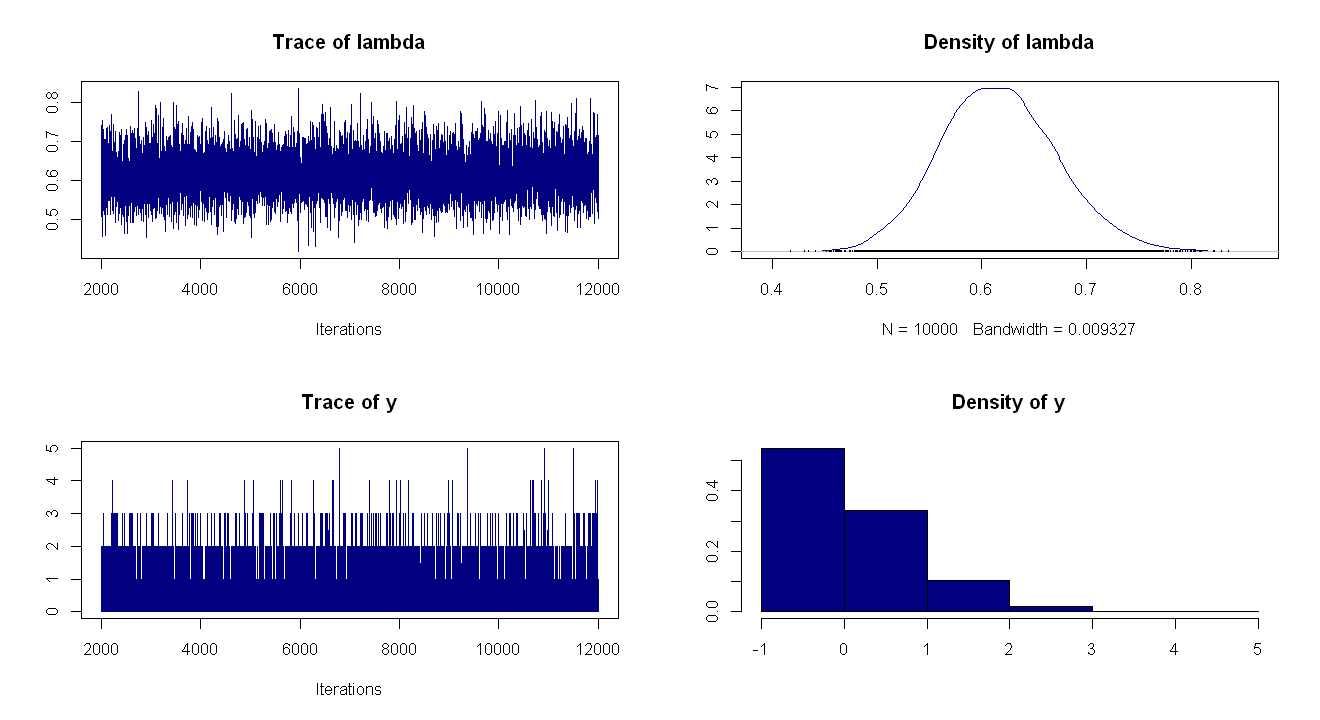

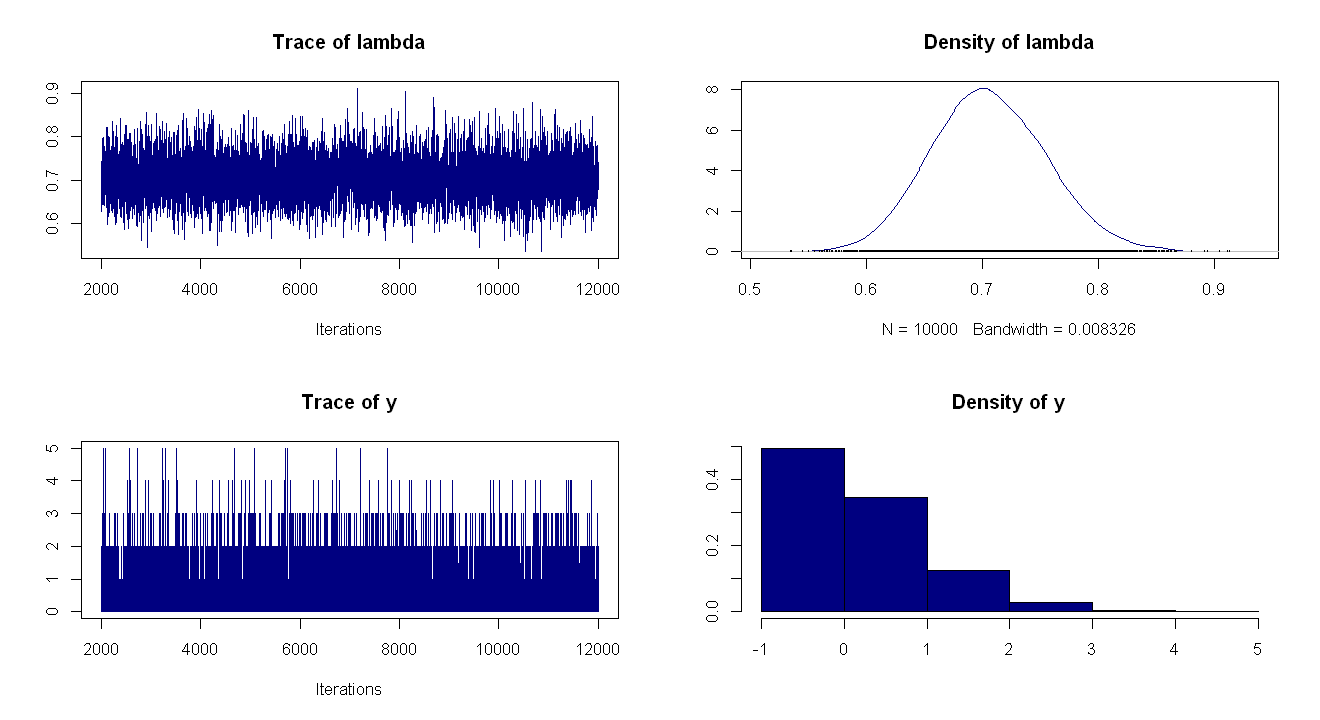

In [51]:
plot(chain.1 , col="navy")
plot(chain.2 , col="navy")


 Correlation matrix: 
           lambda          y
lambda 1.00000000 0.07390577
y      0.07390577 1.00000000


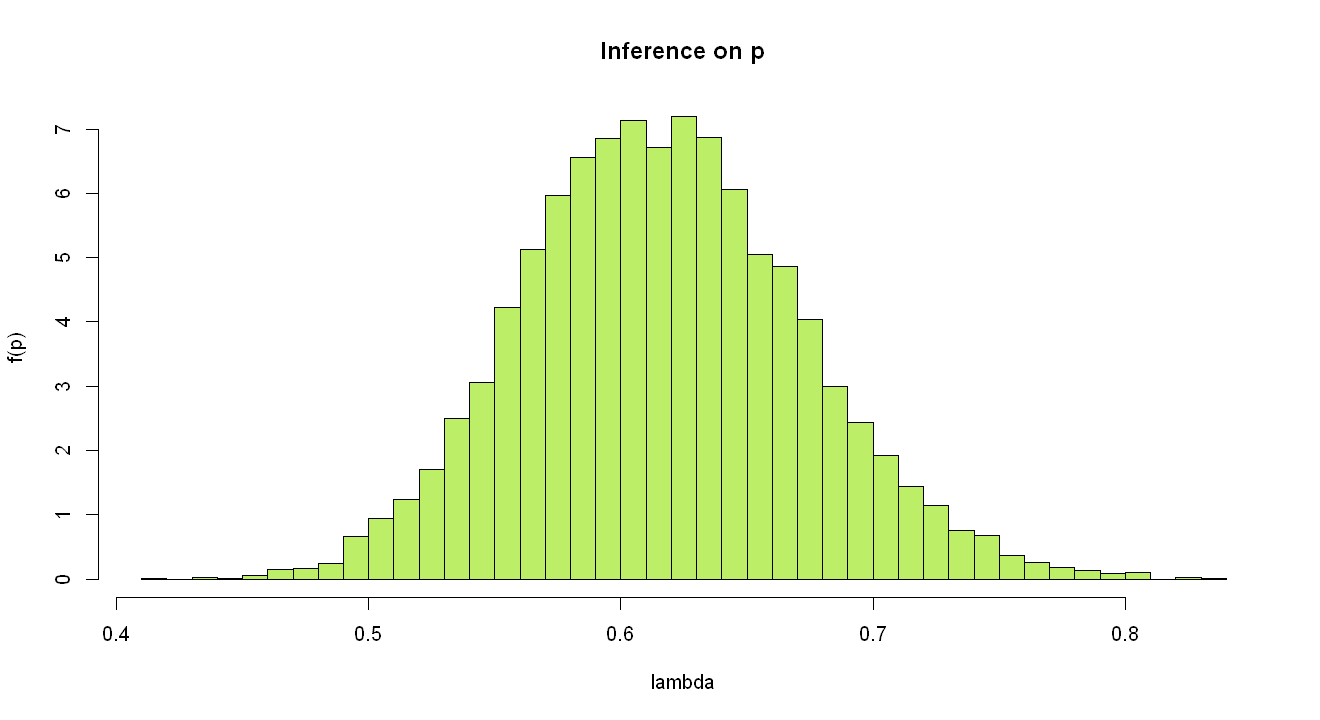

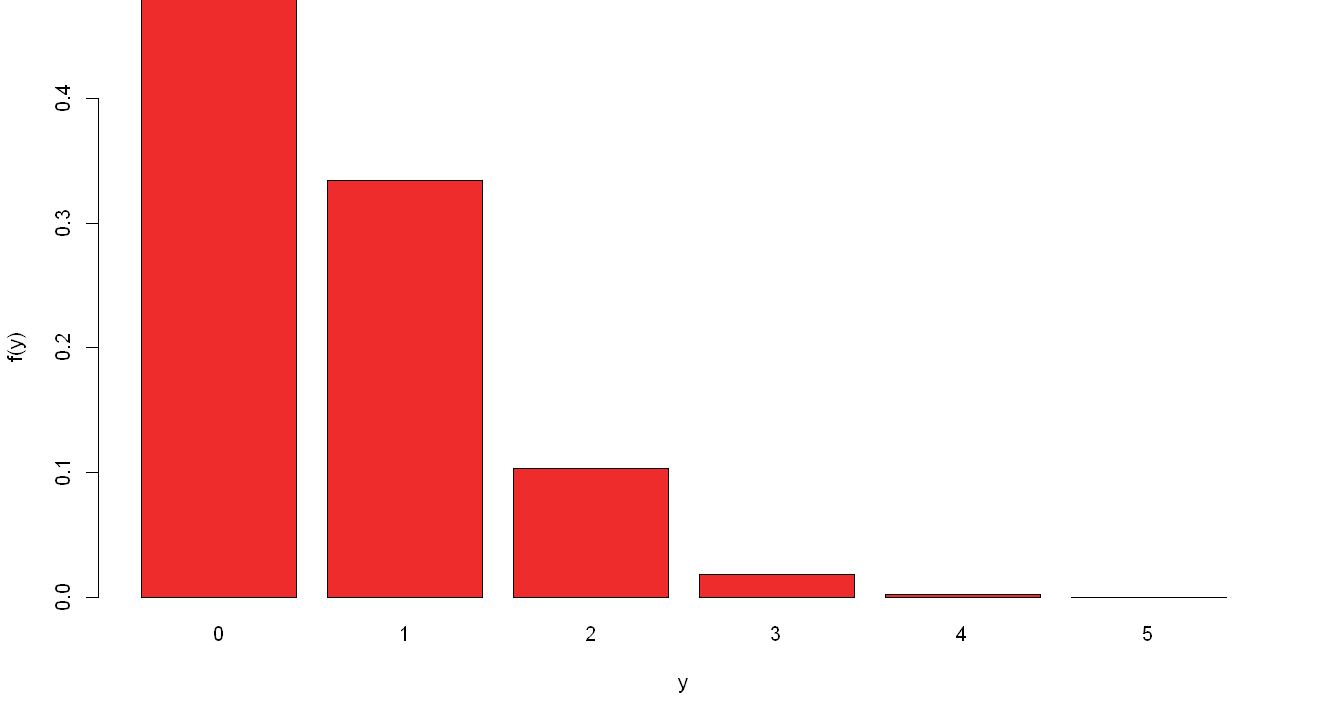

In [52]:
# Let's format our chain
chain.1.df <- as.data.frame( as.mcmc(chain.1) )
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain.1.df))
#
# p inference result
#
hist(chain.1.df$lambda, nc=50, prob=TRUE , col='darkolivegreen2',
xlab='lambda', ylab='f(p)', main='Inference on p')
#
# next data prediction probability
#
ty <- table(chain.1.df$y)
barplot(ty/sum(ty), col='firebrick2', xlab='y', ylab='f(y)',
ylim=c(0,0.40),
main=sprintf('Number of successes in %d future trials', data.1$n_next))


 Correlation matrix: 
           lambda          y
lambda 1.00000000 0.06219404
y      0.06219404 1.00000000


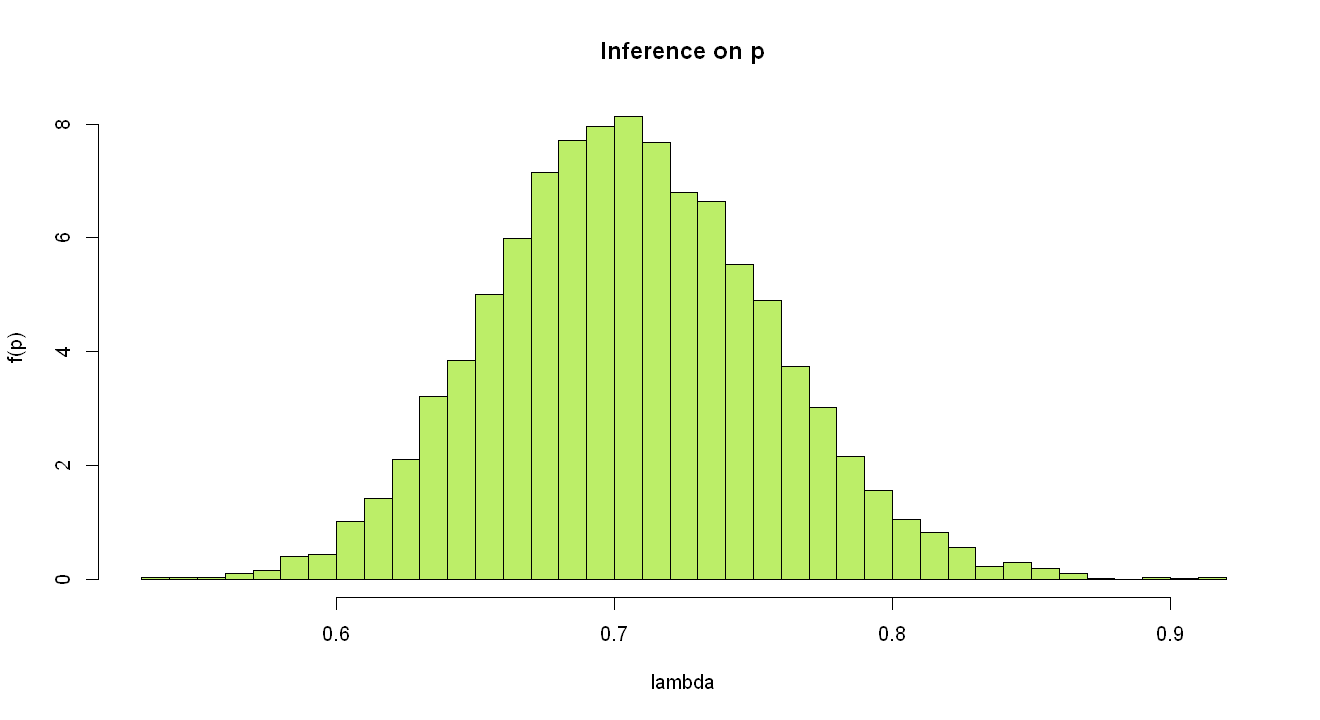

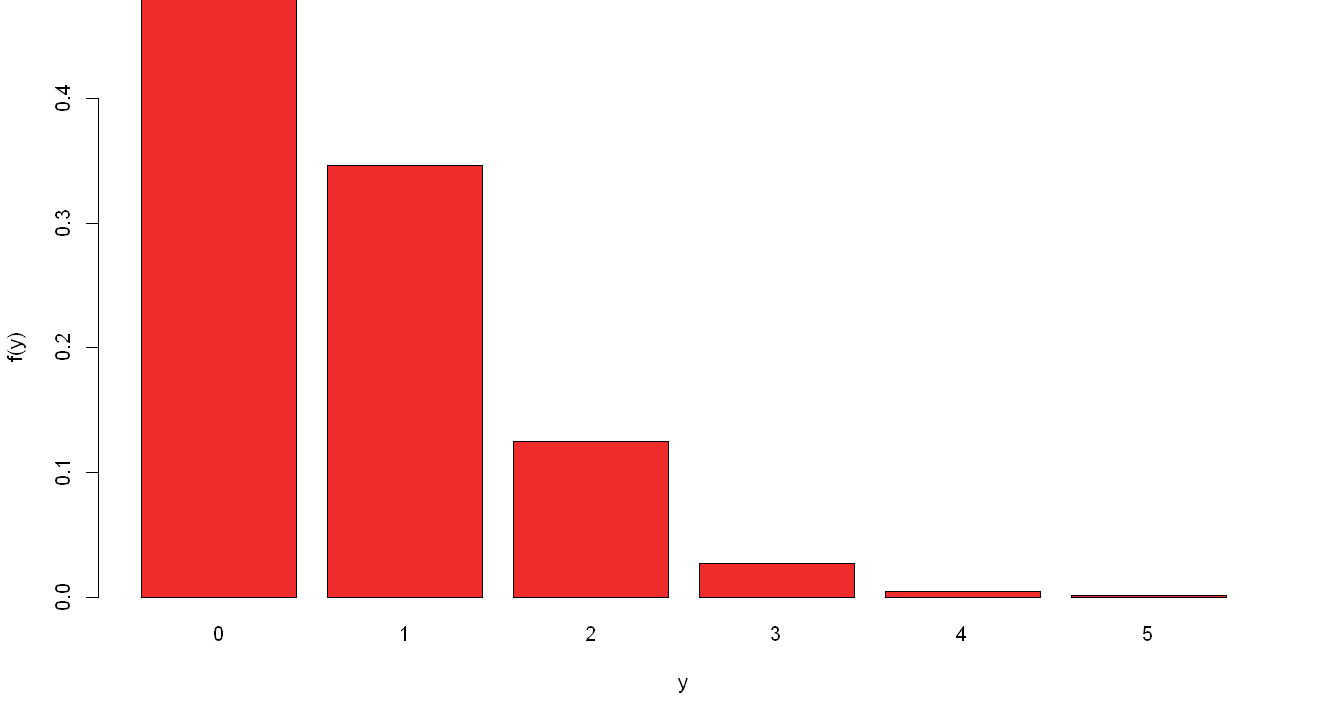

In [53]:
# Let's format our chain
chain.2.df <- as.data.frame( as.mcmc(chain.2) )
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain.2.df))
#
# p inference result
#
hist(chain.2.df$lambda, nc=50, prob=TRUE , col='darkolivegreen2',
xlab='lambda', ylab='f(p)', main='Inference on p')
#
# next data prediction probability
#
ty <- table(chain.2.df$y)
barplot(ty/sum(ty), col='firebrick2', xlab='y', ylab='f(y)',
ylim=c(0,0.40),
main=sprintf('Number of successes in %d future trials', data.1$n_next))

## Exercise 6

In [54]:
y <- 11
n <- 116

In [55]:
numbers <- c(rep(0, n-y), rep(1, y))
data <- NULL
data$X <- numbers
data$n <- n

data$n_next <- 10 # Predictions

data$alpha <- 1
data$beta  <- 10

#we don't need to build the model anymore, since we have already saved it
jm <- jags.model(file=paste(folder, "model_4.txt", sep="/"), data)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 116
   Unobserved stochastic nodes: 2
   Total graph size: 122

Initializing model



In [56]:
# Update the Markov chain (Burn -in)
update(jm , 1000)
chain <- coda.samples(jm , c("p", "y"), n.iter=10000)


 Correlation matrix: 
          p         y
p 1.0000000 0.2599591
y 0.2599591 1.0000000


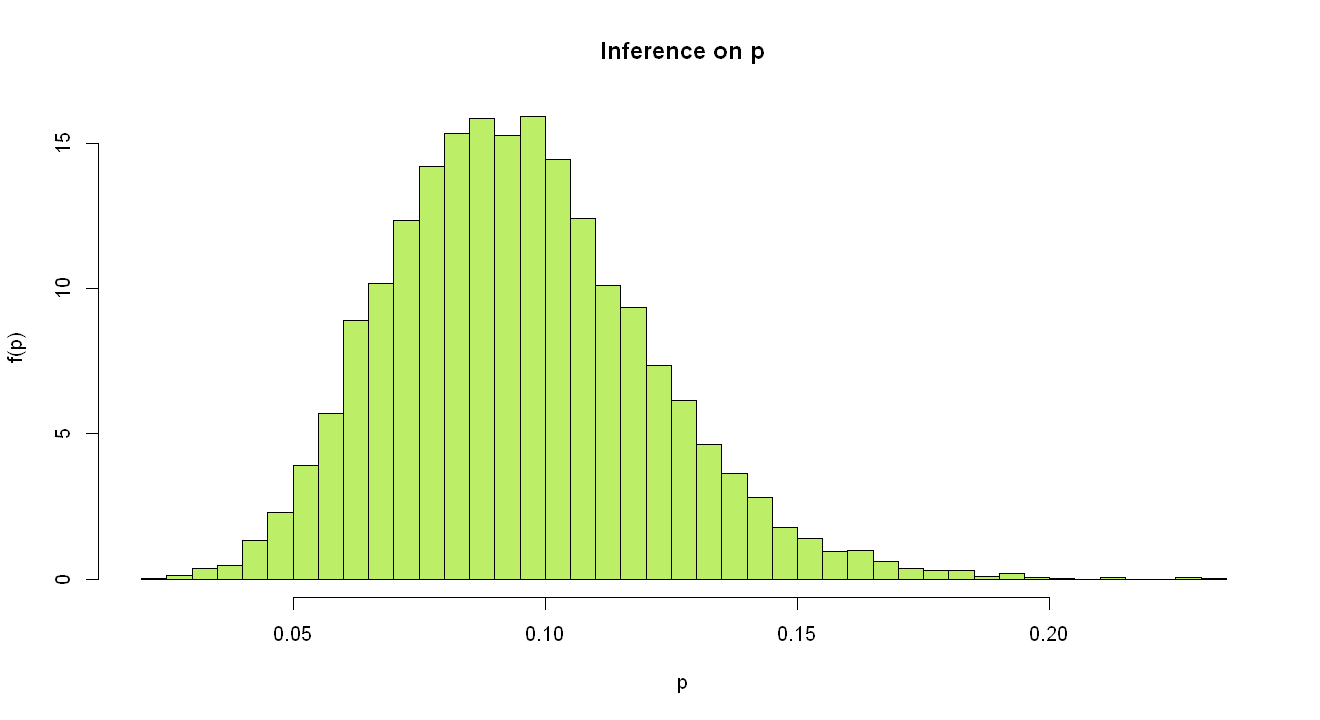

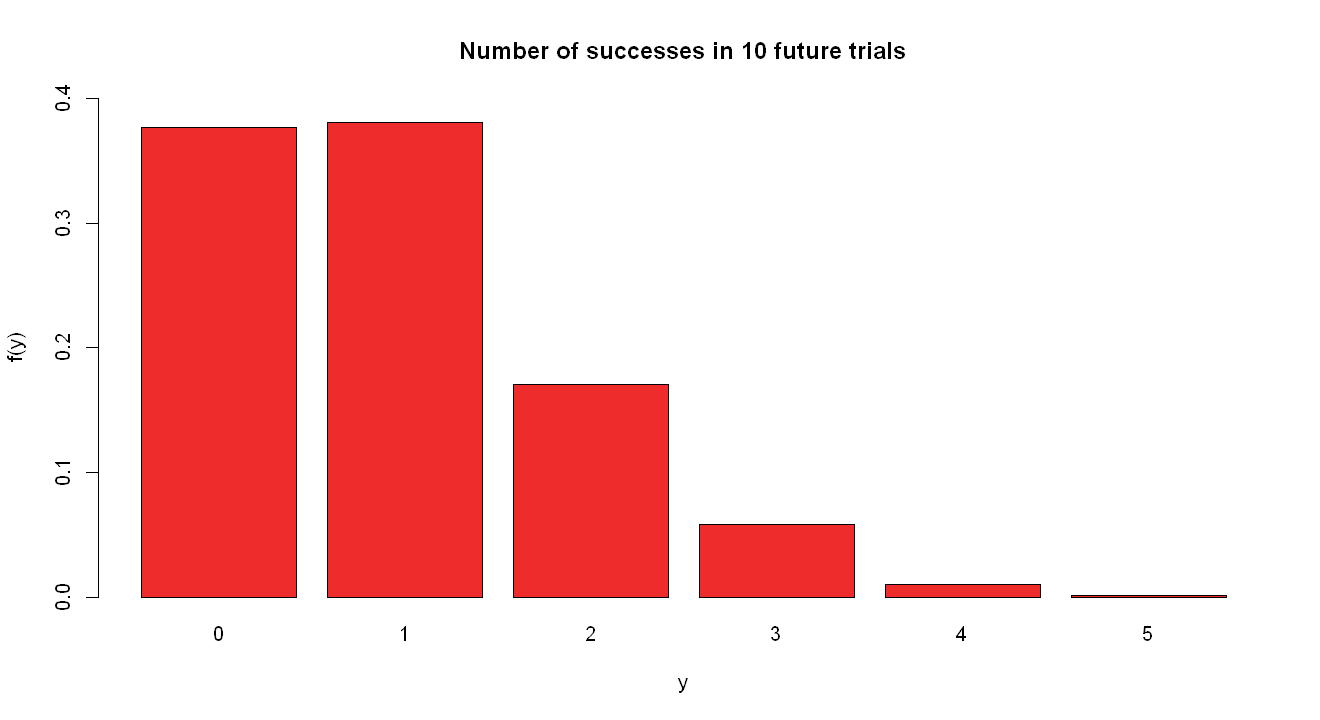

In [57]:
# Let's format our chain
chain.df <- as.data.frame( as.mcmc(chain) )
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain.df))
#
# p inference result
#
hist(chain.df$p, nc=50, prob=TRUE , col='darkolivegreen2',
xlab='p', ylab='f(p)', main='Inference on p')
#
# next data prediction probability
#
ty <- table(chain.df$y)
barplot(ty/sum(ty), col='firebrick2', xlab='y', ylab='f(y)',
ylim=c(0,0.40),
main=sprintf('Number of successes in %d future trials', data$n_next))

In [58]:
print(summary(chain))


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

     Mean     SD Naive SE Time-series SE
p 0.09481 0.0257 0.000257       0.000257
y 0.95050 0.9516 0.009516       0.009516

2. Quantiles for each variable:

     2.5%     25%     50%    75%  97.5%
p 0.05063 0.07664 0.09296 0.1104 0.1511
y 0.00000 0.00000 1.00000 1.0000 3.0000

